In [ ]:
# Task-1: Predictive Modeling

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [19]:
df = pd.read_csv("C:/Users/sapna/Downloads/Dataset  (1).csv")

In [20]:
print(df)

      Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                           

In [21]:
# Remove rows where any cell contains the replacement character �
df = df[~df.astype(str).apply(lambda x: x.str.contains('�')).any(axis=1)]

print(df)

      Restaurant ID            Restaurant Name  Country Code  \
0           6317637           Le Petit Souffle           162   
1           6304287           Izakaya Kikufuji           162   
2           6300002     Heat - Edsa Shangri-La           162   
3           6318506                       Ooma           162   
4           6314302                Sambo Kojin           162   
...             ...                        ...           ...   
9512        5800710  The Manhattan Fish Market           191   
9513        5800433                 The Sizzle           191   
9514        5800176           Ministry of Crab           191   
9515        5801321               Cafe Beverly           191   
9516        5800612              Burger's King           191   

                  City                                            Address  \
0          Makati City  Third Floor, Century City Mall, Kalayaan Avenu...   
1          Makati City  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   


In [22]:
# identify the number of rows and columns
df=df.dropna(axis=0)
df.shape

(9296, 21)

In [23]:
# Convert "Aggregate rating" to numeric
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')


In [24]:

print("Missing values:", df['Aggregate rating'].isna().sum())


Missing values: 0


In [25]:
# check datatype
print("Data type:", df['Aggregate rating'].dtype)


Data type: float64


In [26]:
df['Aggregate rating'] = df['Aggregate rating'].astype('int')
df['Aggregate rating'].dtypes

dtype('int32')

In [27]:
# Drop rows with missing target variable
df = df[df['Aggregate rating'].notna()]

# Select useful features (update based on your dataset)
features = ['Country Code', 'City', 'Cuisines', 'Latitude', 'Longitude',
            'Price range', 'Average Cost for two']

# Keep only needed columns
df_model = df[features + ['Aggregate rating']].copy()

# Handle missing values (drop or fill)
df_model.dropna(inplace=True)

# Encode categorical columns
label_encoders = {}
for col in ['City', 'Cuisines']:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le

# Features (X) and target (y)
X = df_model.drop('Aggregate rating', axis=1)
y = df_model['Aggregate rating']


In [28]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred_lr))
print("Linear Regression RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))


Linear Regression R²: 0.23932335080893752
Linear Regression RMSE: 1.192828478736299


In [30]:
# Decision Tree
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree R²:", r2_score(y_test, y_pred_dt))
print("Decision Tree RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_dt)))


Decision Tree R²: -0.061220848519313975
Decision Tree RMSE: 1.408902188352366


In [31]:
# Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest R²:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))


Random Forest R²: 0.3700216776168157
Random Forest RMSE: 1.0855273243233845


In [32]:
# Compare Results
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R2 Score': [
        r2_score(y_test, y_pred_lr),
        r2_score(y_test, y_pred_dt),
        r2_score(y_test, y_pred_rf)
    ],
    'RMSE': [
        np.sqrt(mean_squared_error(y_test, y_pred_lr)),
        np.sqrt(mean_squared_error(y_test, y_pred_dt)),
        np.sqrt(mean_squared_error(y_test, y_pred_rf))
    ]
})
print(results)


               Model  R2 Score      RMSE
0  Linear Regression  0.239323  1.192828
1      Decision Tree -0.061221  1.408902
2      Random Forest  0.370022  1.085527


In [ ]:
# TASK-2: Customer Preference Analysis

Cuisines
Hyderabadi, Biryani, North Indian                             4.0
North Indian, Mangalorean, Chinese                            4.0
European, Asian, North Indian, Italian, Continental, Pizza    4.0
Cafe, Grill                                                   4.0
European, Cafe                                                4.0
European, Cafe, Italian                                       4.0
Japanese, Chinese, Thai, Malaysian, Burmese, Asian            4.0
Cafe, Fast Food, Italian                                      4.0
Cafe, Fast Food, Healthy Food                                 4.0
North Indian, Italian, Parsi, Asian, Kerala                   4.0
Name: Aggregate rating, dtype: float64


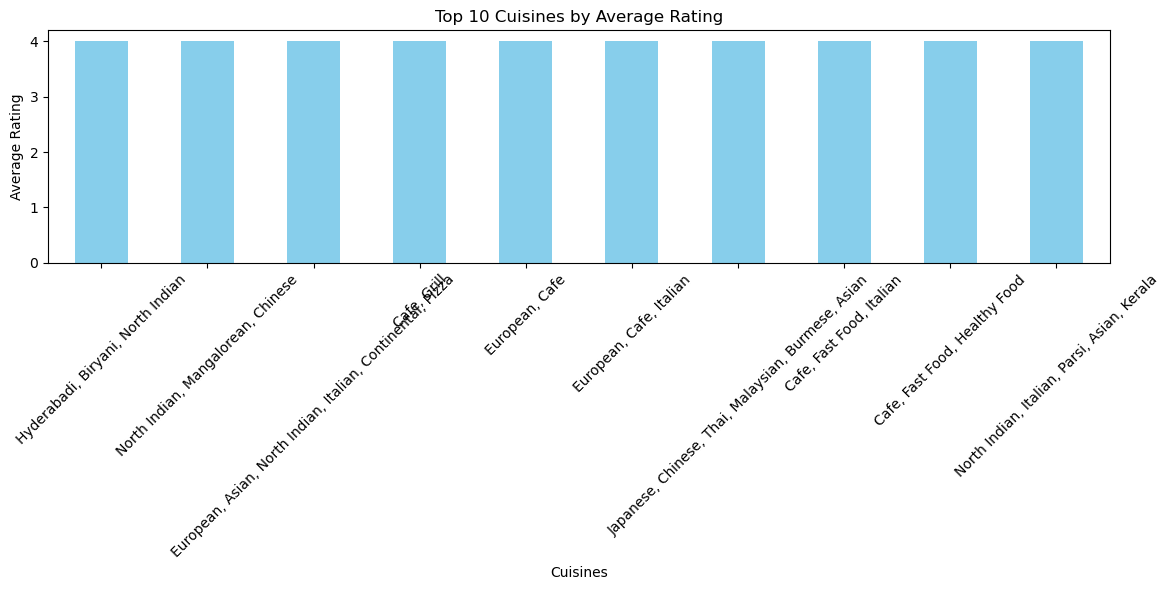

In [33]:
# Group by Cuisines and calculate average rating
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False)

# Show top 10 cuisines by rating
print(avg_rating_by_cuisine.head(10))

# Plot top 10
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
avg_rating_by_cuisine.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Cuisines by Average Rating')
plt.ylabel('Average Rating')
plt.xlabel('Cuisines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Cuisines
North Indian, Mughlai                    53511
North Indian                             46222
North Indian, Chinese                    42011
Cafe                                     27261
Chinese                                  21713
North Indian, Mughlai, Chinese           19945
Fast Food                                17544
South Indian                             16433
Mughlai, North Indian                    15275
European, Mediterranean, North Indian    12541
Name: Votes, dtype: int64


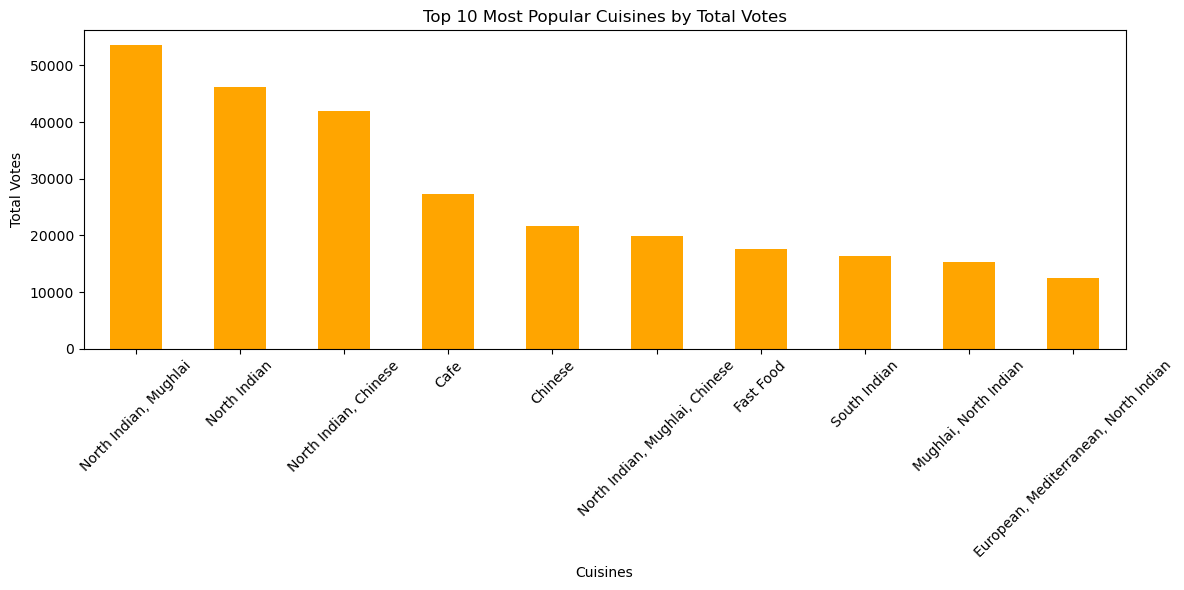

In [34]:
# Group by Cuisines and sum the votes
cuisine_votes = df.groupby('Cuisines')['Votes'].sum().sort_values(ascending=False)

# Show top 10 popular cuisines by vote count
print(cuisine_votes.head(10))

# Plot top 10
plt.figure(figsize=(12, 6))
cuisine_votes.head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Most Popular Cuisines by Total Votes')
plt.ylabel('Total Votes')
plt.xlabel('Cuisines')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [35]:
# Combine average rating and total votes
cuisine_analysis = df.groupby('Cuisines').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Restaurant ID': 'count'
}).rename(columns={'Restaurant ID': 'Num Restaurants'}).sort_values('Aggregate rating', ascending=False)

print(cuisine_analysis.head(10))


                                                    Aggregate rating  Votes  \
Cuisines                                                                      
Hyderabadi, Biryani, North Indian                                4.0    295   
North Indian, Mangalorean, Chinese                               4.0    345   
European, Asian, North Indian, Italian, Contine...               4.0    826   
Cafe, Grill                                                      4.0    235   
European, Cafe                                                   4.0    772   
European, Cafe, Italian                                          4.0   1607   
Japanese, Chinese, Thai, Malaysian, Burmese, Asian               4.0    300   
Cafe, Fast Food, Italian                                         4.0   3525   
Cafe, Fast Food, Healthy Food                                    4.0    135   
North Indian, Italian, Parsi, Asian, Kerala                      4.0    146   

                                                   

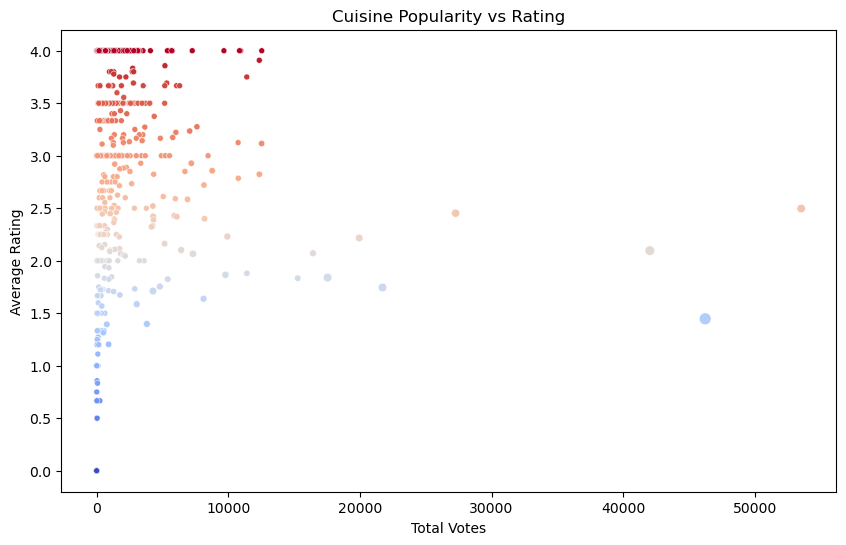

In [36]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cuisine_analysis, x='Votes', y='Aggregate rating', size='Num Restaurants', hue='Aggregate rating', legend=False, palette='coolwarm')
plt.title('Cuisine Popularity vs Rating')
plt.xlabel('Total Votes')
plt.ylabel('Average Rating')
plt.show()


In [ ]:
# TASK-3: 

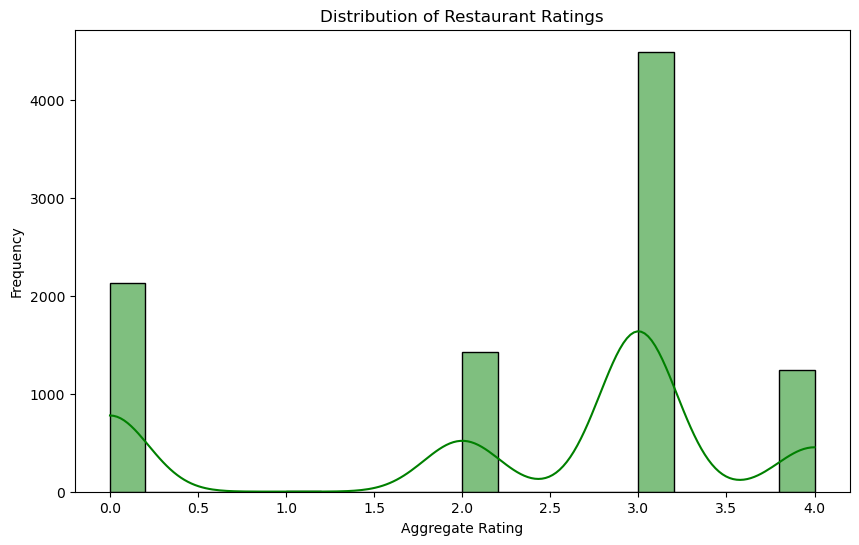

In [37]:
#  Histogram with KDE (Density Curve)
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Aggregate rating'].dropna(), bins=20, kde=True, color='green')
plt.title('Distribution of Restaurant Ratings')
plt.xlabel('Aggregate Rating')
plt.ylabel('Frequency')
plt.show()


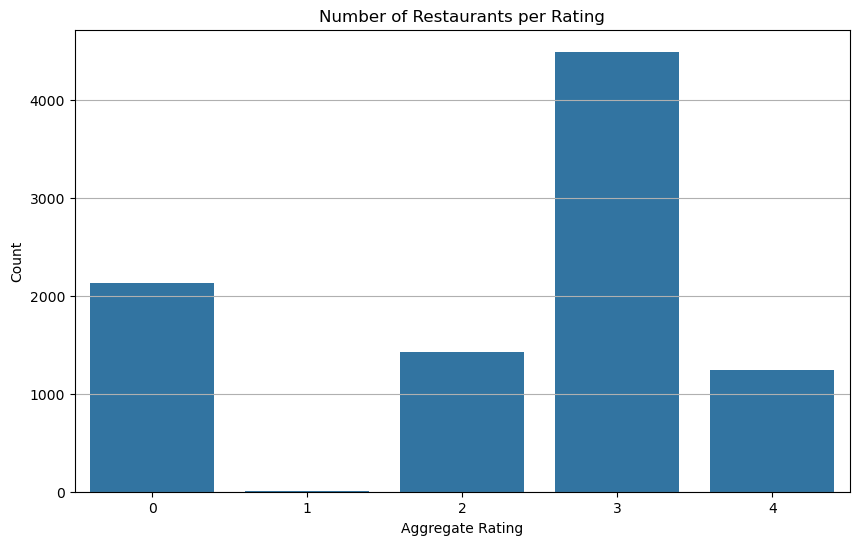

In [39]:
# Bar Plot of Rating Counts
rating_counts = df['Aggregate rating'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values)
plt.title('Number of Restaurants per Rating')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.grid(axis='y')
plt.show()


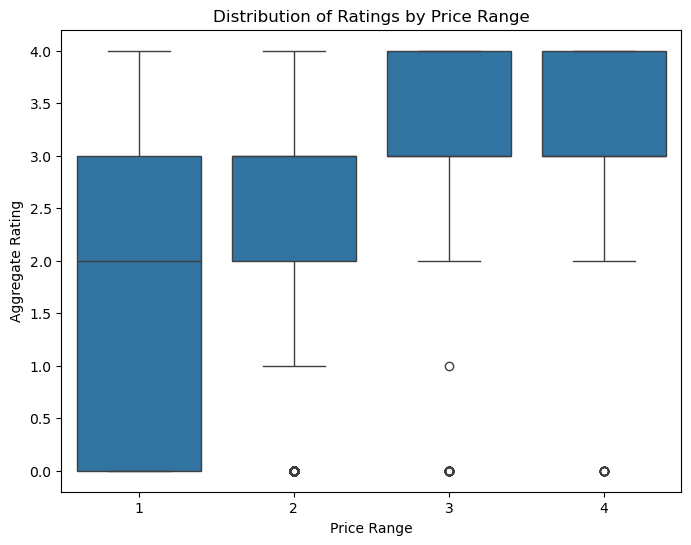

In [41]:
#  Box Plot of Ratings by Price Range
plt.figure(figsize=(8, 6))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Distribution of Ratings by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Aggregate Rating')
plt.show()


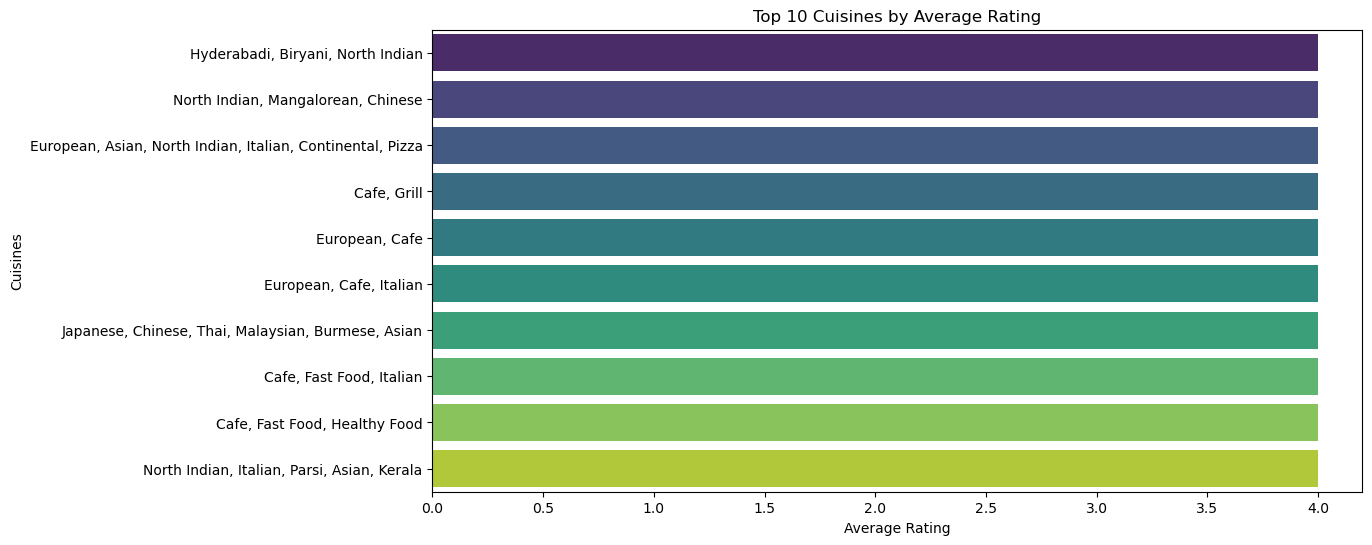

In [46]:
# Compare Average Ratings of Different Cuisines
avg_rating_by_cuisine = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
#sns.barplot(x=avg_rating_by_cuisine.values, y=avg_rating_by_cuisine.index, palette='viridis')
sns.barplot(x=avg_rating_by_cuisine.values, y=avg_rating_by_cuisine.index, hue=avg_rating_by_cuisine.index, dodge=False, palette='viridis', legend=False)

plt.title('Top 10 Cuisines by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Cuisines')
plt.show()


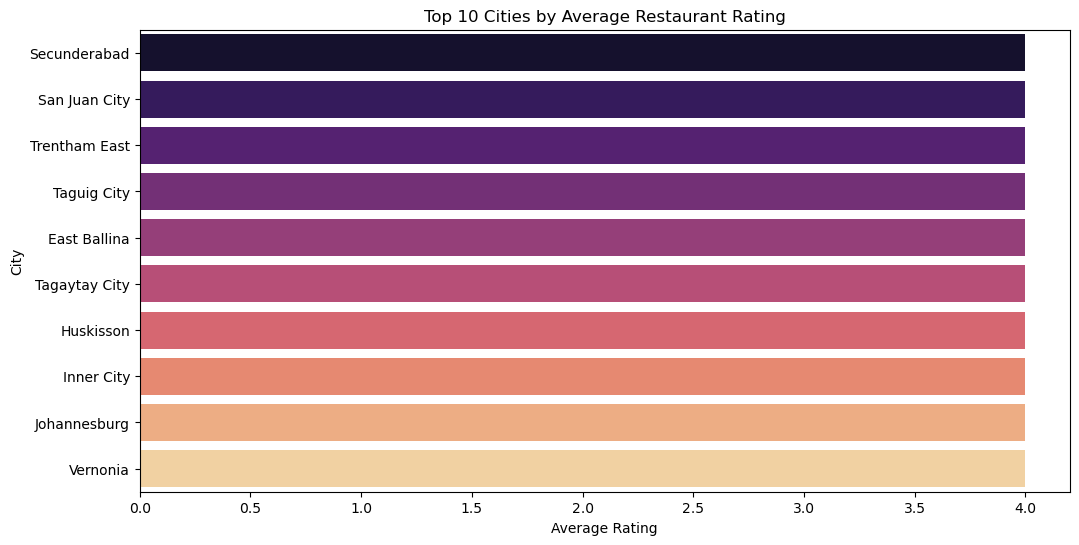

In [49]:
# Compare Average Ratings of Different Cities
plt.figure(figsize=(12, 6))
sns.barplot(
    x=avg_rating_by_city.values,
    y=avg_rating_by_city.index,
    hue=avg_rating_by_city.index,     # Add hue to avoid the warning
    palette='magma',
    dodge=False,                      # Keeps bars from splitting
    legend=False                      # No need to show legend for each city again
)
plt.title('Top 10 Cities by Average Restaurant Rating')
plt.xlabel('Average Rating')
plt.ylabel('City')
plt.show()


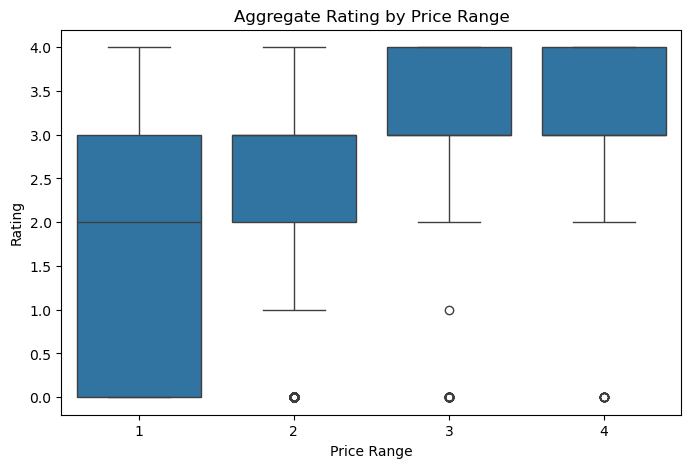

In [50]:
# Price Range vs Rating
plt.figure(figsize=(8, 5))
sns.boxplot(x='Price range', y='Aggregate rating', data=df)
plt.title('Aggregate Rating by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Rating')
plt.show()


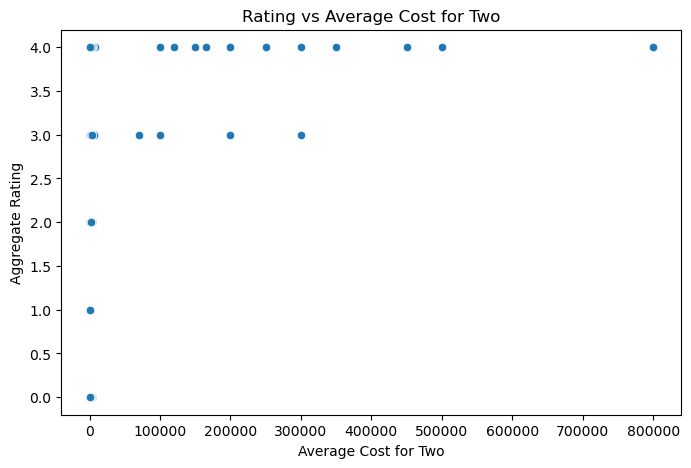

In [51]:
# Average Cost for Two vs Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Average Cost for two', y='Aggregate rating', data=df)
plt.title('Rating vs Average Cost for Two')
plt.xlabel('Average Cost for Two')
plt.ylabel('Aggregate Rating')
plt.show()
